#### Time Series Analysis

In [ ]:
# Find path
import os,sys
sys.path.append(os.path.abspath(os.path.join('..')))

from scripts.utils import *

In [2]:
# Read dataset

df = read_csv('../data/raw_analyst_ratings_data/raw_analyst_ratings.csv')

In [3]:
# Dataframe head

df.head(10)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


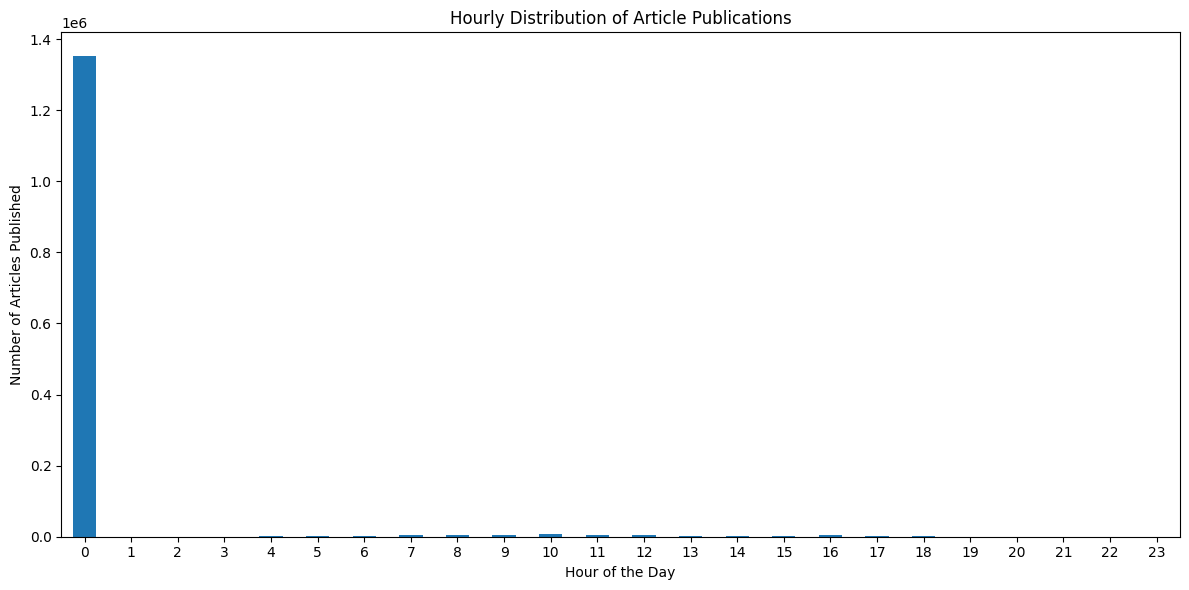

The highest publication activity occurs at 0:00
Dates with significant publication increases:
date
2009-08-10    1130
2011-05-23     930
2011-07-28    1042
2016-08-04     943
2016-10-27     931
              ... 
2020-05-07    1396
2020-05-08     927
2020-05-13    1005
2020-05-26     967
2020-06-05     932
Length: 85, dtype: int64


In [4]:
# Analyzing Time Series Data

print(publication_time_distribution(df))
publication_spikes = detect_publication_anomalies(df)
print("Dates with significant publication increases:")
print(publication_spikes)

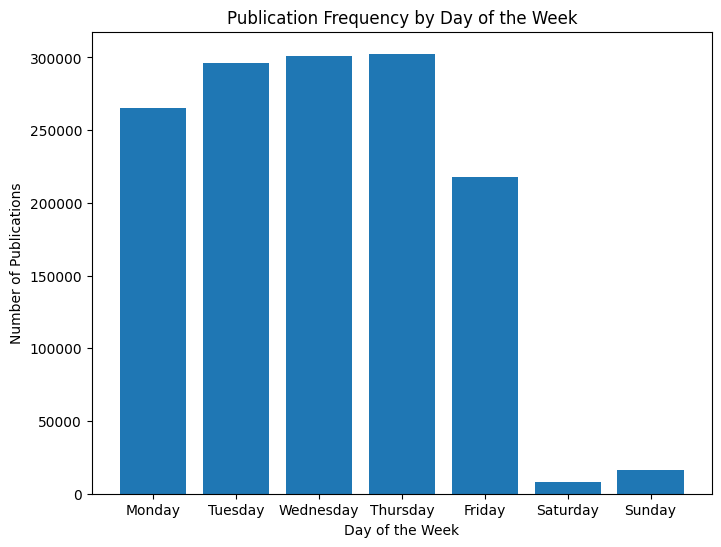

In [5]:
# Publication Frequency by day of the week

plot_publication_frequency_by_day(df)

In [10]:
# Publication frequency over time

# analyze_publication_trends(df)

df['publication_date'] = pd.to_datetime(df['date'])
    
    # Extract day names for trend analysis
df['publication_day'] = df['publication_date'].dt.day_name()
publication_trends = df.groupby('publication_day').size()
    
    # Extract time for time series analysis
df['publication_time'] = df['publication_date'].dt.time
    
    # Plot publication frequency over time
df.set_index('publication_date').resample('D').size().plot()
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

KeyError: 'date'